![seperator2](https://i.imgur.com/4gX5WFr.png)

In [2]:
import pandas as pd

In [3]:
# reading the csv file
df_population_raw = pd.read_csv('population_total.csv')

In [4]:
#first look at the dataset
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


# 1 Making a Pivot Table

.pivot(): Returns reshaped DataFrame organized by given index/column values("pivot without
aggregation")

In [5]:
#dropping null values
df_population_raw.dropna(inplace=True)

In [6]:
#making a pivot table
df_pivot = df_population_raw.pivot(index='year',columns='country',values='population')

In [9]:
#selecting some countries
df_pivot = df_pivot[['United States','India','China','Indonesia','Brazil']]

In [10]:
#showing pivot table
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


In [11]:
df_pivot.describe()

country,United States,India,China,Indonesia,Brazil
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,2.675474e+08,9.649575e+08,1.154278e+09,1.931995e+08,1.553103e+08
std,5.515992e+07,3.574762e+08,2.922168e+08,6.949752e+07,5.333306e+07
min,1.716853e+08,4.098806e+08,6.122416e+08,7.727342e+07,6.253392e+07
25%,2.216800e+08,6.420654e+08,9.447030e+08,1.348725e+08,1.105857e+08
50%,2.734373e+08,1.010249e+09,1.265736e+09,2.042240e+08,1.684051e+08
75%,3.224816e+08,1.320926e+09,1.412249e+09,2.607631e+08,2.057402e+08
max,3.310027e+08,1.380004e+09,1.439324e+09,2.735236e+08,2.125594e+08


![seperator1](https://i.imgur.com/ZUWYTii.png)

## 2 Lineplot

<AxesSubplot:title={'center':'Population (1955-2020)'}, xlabel='Year', ylabel='Population'>

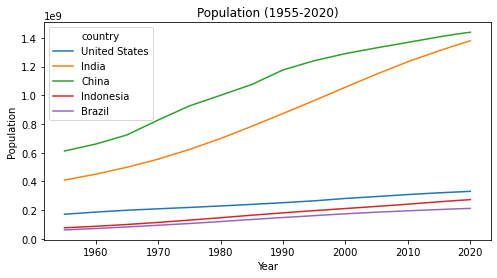

In [12]:
df_pivot.plot(kind='line',xlabel='Year',ylabel='Population',
             title='Population (1955-2020)',
             figsize=(8,4))

![seperator1](https://i.imgur.com/ZUWYTii.png)

## 3 Barplot

In [15]:
#selecting only one year (2020)
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]

In [17]:
#showing new dataframe
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [18]:
#transpose dataframe from rows to columns or viceversa
df_pivot_2020 = df_pivot_2020.T

<AxesSubplot:title={'center':'Popluation 2020'}, xlabel='Year', ylabel='Population'>

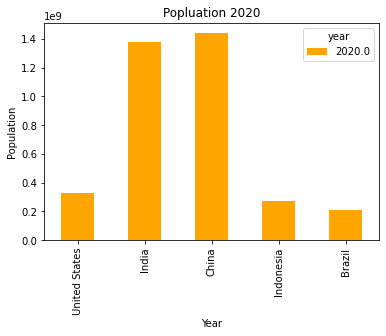

In [20]:
#making barplot
df_pivot_2020.plot(kind='bar',color='orange',
                  xlabel='Year', ylabel='Population',
                  title='Popluation 2020')

## 3.2 Barplot grouped by "n" variables

In [23]:
#selecting a few years
df_pivot_sample = df_pivot[df_pivot.index.isin([1980,1990,2000,2010,2020])]


<AxesSubplot:xlabel='Year', ylabel='Population'>

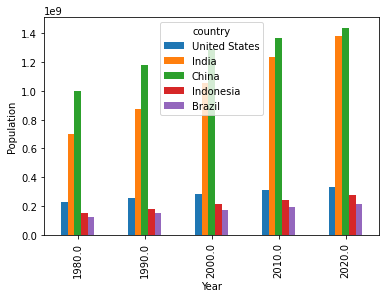

In [25]:
# making grouped barplot
df_pivot_sample.plot(kind='bar',xlabel='Year',ylabel='Population')

![seperator1](https://i.imgur.com/ZUWYTii.png)

## 4 Piechart

In [27]:
#changing column name
df_pivot_2020.rename(columns={2020:'2020'},inplace=True)

<AxesSubplot:title={'center':'Population in 2020(%)'}, ylabel='2020'>

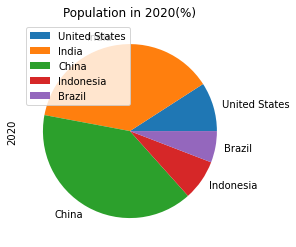

In [30]:
#making the plot
df_pivot_2020.plot(kind='pie',y='2020',title='Population in 2020(%)')

![seperator2](https://i.imgur.com/4gX5WFr.png)